# Packages

In [1]:
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from rpy2.robjects import r, pandas2ri


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [3]:
import geometric_sampling as gs
from geometric_sampling.search.astar import AStar
from geometric_sampling.design import Design
from geometric_sampling.criteria.var_nht import VarNHT



# R Different Populations

In [4]:
%%R
install.packages("sampling")
library(sampling)

* installing *source* package ‘sampling’ ...
** package ‘sampling’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0’


gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c init.c -o init.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-FPSnzf/r-base-4.3.3=/usr/src/r-base-4.3.3-2build2 -Wdate-time -D_FORTIFY_SOURCE=3  -c str.c -o str.o
gcc -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -flto=auto -ffat-lto-objects -Wl,-z,relro -o sampling.so init.o str.o -L/usr/lib/R/lib -lR


installing to /home/divar/R/x86_64-pc-linux-gnu-library/4.3/00LOCK-sampling/00new/sampling/libs
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sampling)


Installing package into ‘/home/divar/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/sampling_2.10.tar.gz'
Content type 'application/x-gzip' length 574173 bytes (560 KB)
downloaded 560 KB


The downloaded source packages are in
	‘/tmp/Rtmpj4Qh1v/downloaded_packages’
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/local/lib/R/site-library’ contains no packages


In [5]:
ro.r('library(sampling)')
ro.r('n_percent = .05')


sampling = importr('sampling')
ro.r('library(sampling)')


ro.r('x1 = swiss$Education')
ro.r('y1 = swiss$Examination')




#ro.r('rand_seed = sample(length(x1))')
#ro.r('x1 = x1[rand_seed]')
#ro.r('y1 = y1[rand_seed]')

x1 = np.array(ro.r('x1'))
y1 = np.array(ro.r('y1'))

ro.r('N1 = length(x1)')
N1 = ro.r('N1')
ro.r('n1 = round(n_percent * N1)')
n1 = ro.r('n1')
ro.r('inclusions1 = inclusionprobabilities(x1, n1)')

inclusions1 = ro.r("inclusions1")

inclusions1[inclusions1 == 0] = 1e-4
print(np.corrcoef(x1, y1)[0,1])





# SWISS
#https://search.r-project.org/CRAN/refmans/sampling/html/swissmunicipalities.html
ro.r('data(swissmunicipalities)')
ro.r('y2 = swissmunicipalities$Airbat')
ro.r('x2 = swissmunicipalities$Pop020')
ro.r('v2 = swissmunicipalities$Airind')
ro.r('h2 = swissmunicipalities$H00P01')
ro.r('w2 = swissmunicipalities$H00P04')


x2 = np.array(ro.r('x2'))
y2 = np.array(ro.r('y2'))
v2 = np.array(ro.r('v2'))
w2 = np.array(ro.r('w2'))
h2 = np.array(ro.r('h2'))

ro.r('N2 = length(x2)')
N2 = ro.r('N2')
ro.r('n2 = round(n_percent * N2)')
n2 = ro.r('n2')
ro.r('inclusions2 = inclusionprobabilities(x2, n2)')
inclusions2 = ro.r("inclusions2")

inclusions2[inclusions2 == 0] = 1e-4
print(np.corrcoef(x2, y2)[0,1])






#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')


x3 = np.array(ro.r('x3'))
y3 = np.array(ro.r('y3'))
v3 = np.array(ro.r('v3'))
w3 = np.array(ro.r('w3'))
h3 = np.array(ro.r('h3'))

ro.r('N3 = length(x3)')
N3 = ro.r('N3')
ro.r('n3 = round(n_percent * N3)')
n3 = ro.r('n3')
#ro.r('inclusions3 = inclusionprobabilities(x3 + runif(N3, -1,1), n3)')
ro.r('inclusions3 = inclusionprobabilities(x3, n3)')

inclusions3 = ro.r("inclusions3")
inclusions3[inclusions3 == 0] = 1e-4
ro.r('print(cor(x3,y3))')






#simu
ro.r('x4 = rnorm(100, 200, 5)')
ro.r('y4 = x4 + runif(100, -5, 5)')
ro.r('z4 = x4 + runif(100, -5, 5)')

ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x4))')
ro.r('x4 = x4[rand_seed]')
ro.r('y4 = y4[rand_seed]')
ro.r('z4 = z4[rand_seed]')

x4 = np.array(ro.r('x4'))
y4 = np.array(ro.r('y4'))
z4 = np.array(ro.r('z4'))

ro.r('N4 = length(x4)')
N4 = ro.r('N4')
ro.r('n4 = round(n_percent * N4)')
n4 = ro.r('n4')
ro.r('inclusions4 = inclusionprobabilities(x4, n4)')
inclusions4 = ro.r("inclusions4")
inclusions4[inclusions4 == 0] = 1e-4





#MU284 Sweden
ro.r('data(MU284)')
ro.r('y5 = MU284$RMT85')
ro.r('x5 = MU284$P85')
ro.r('g5 = MU284$P75')
ro.r('v5 = MU284$S82')
ro.r('h5 = MU284$ME84')
ro.r('w5 = MU284$REV84')



y5 = np.array(ro.r('y5'))
x5 = np.array(ro.r('x5'))
g5 = np.array(ro.r('g5'))
v5 = np.array(ro.r('v5'))
h5 = np.array(ro.r('h5'))
w5 = np.array(ro.r('w5'))


ro.r('N5 = length(x5)')
N5 = ro.r('N5')
ro.r('n5 = round(n_percent * N5)')
n5 = ro.r('n5')
ro.r('inclusions5 = inclusionprobabilities(x5, n5)')
inclusions5 = ro.r("inclusions5")
inclusions5[inclusions5 == 0] = 1e-4



#Belg
ro.r('data(belgianmunicipalities)')
ro.r('x3 = belgianmunicipalities$Tot04/1000')
ro.r('y3 = belgianmunicipalities$Totaltaxation/1000000')
ro.r('v3 = belgianmunicipalities$averageincome/1000000')
ro.r('w3 = belgianmunicipalities$Men03/1000')
ro.r('h3 = belgianmunicipalities$Diffmen/1000')


ro.r('set.seed(13242)')
ro.r('rand_seed = sample(length(x3))')
ro.r('x3 = x3[rand_seed]')
ro.r('y3 = y3[rand_seed]')
ro.r('v3 = v3[rand_seed]')
ro.r('w3 = w3[rand_seed]')
ro.r('h3 = h3[rand_seed]')



#small simu
ro.r('x6 = c(1,2,3,4,5,6,7,8,9,10)')
ro.r('y6 = c(10,27,30,4,57,60,70,83,80,130)')

x6 = np.array(ro.r('x6'))
y6 = np.array(ro.r('y6'))

ro.r('N6 = length(x6)')
N6 = ro.r('N6')
ro.r('n6 = 3')
n6 = ro.r('n6')
ro.r('inclusions6 = inclusionprobabilities(x6, n6)')
inclusions6 = ro.r("inclusions6")
inclusions6[inclusions6 == 0] = 1e-4



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/local/lib/R/site-library’ contains no packages



0.6984152962884828
0.9421664139113467
[1] 0.9750693


In [6]:
%%R
swiss_big = 0
swiss_small = 0
if (swiss_big == 1){
# Swiss
data(swissmunicipalities)
y2 = swissmunicipalities$Airbat
x2 = swissmunicipalities$Pop020
v2 = swissmunicipalities$Airind
h2 = swissmunicipalities$H00P01
w2 = swissmunicipalities$H00P04
N = length(y2)
n_percent = .05
n = round(n_percent * N)
n = 10


#1 Great
y <- y2; z <- x2; p <- h2

}


if (swiss_small == 1){
# Swiss
print(cor(swiss))
x1 = -swiss$Education
y1 = -swiss$Examination
h1 = swiss$Agriculture
N = length(y1)
n_percent = .05
n = round(n_percent * N)
n = 5


#1 Great
y <- y1; z <- x1; p <- h1

}


# Simu The best

## R Popu

In [7]:
round(1/281, 3)

0.004

[1] 284
[1] 284
[1] 0.01760563
[1] 284   5
x_NHT, y_NHT 0.2092007 x, z 0.66682 z_NHT, y_NHT 0.3324872 
   sysxy    maxxy    midxy    tilxy    srsxy 
20.93491 22.95456 22.72105 22.95087 38.61808 
    sysy     maxy     midy     tily     srsy 
1945.374 2007.228 1898.480 2005.978 4212.341 
x threshold 20.93491 
 y threshold 1898.48 
[1] 284   5


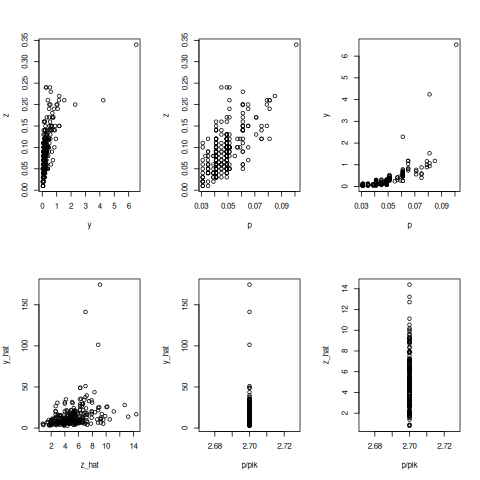

In [8]:
%%R

library(sampling)

#MU284 Sweden
data(MU284)
print(length(MU284[,1]))
#MU284 = MU284[MU284$P85<200,]
print(length(MU284[,1]))
set.seed(120)
MU284 = MU284[sample(length(MU284[,1])),]
#MU284 = MU284[order(-MU284$ME84),]
y5 = MU284$RMT85
x5 = MU284$P85/100
g5 = MU284$P75/100
v5 = MU284$S82/1000
h5 = MU284$ME84/1000
w5 = MU284$REV84/1000


RMT85 = MU284$RMT85
P85 = MU284$P85/100
P75 = MU284$P75/100
S82 = MU284$S82/1000
CS82 = MU284$CS82/100
SS82 = MU284$SS82/100
ME84 = MU284$ME84/1000
REV84 = MU284$REV84/1000
REG = MU284$REG

N = length(REV84)
r <- runif(N, .1, .8)
e <- rep (1, N)




y <- P85; z <- ME84 ; p <- P75 # be rahe!
# y <- P85; z <- ME84 ; p <- S82
# y <- P85; z <- ME84 ; p <- SS82
#  y <- P85; z <- ME84 ; p <- e 
 

# y <- P85; z <- REV84; p <- P75 # be rahe!
# y <- P85; z <- REV84; p <- S82
# y <- P85; z <- REV84; p <- SS82
# y <- P85; z <- REV84; p <- e 


y <- P85; z <- CS82; p <- ME84 # be rahe!
y <- P85; z <- CS82; p <- S82
# y <- P85; z <- CS82; p <- SS82
#y <- P85; z <- CS82; p <- e 



# data(mtcars)
# y <- mtcars$cyl; z <- mtcars$disp; p <- mtcars$hp # be rahe!


N = length(y)
n = 5
print(n/N)
pik <- inclusionprobabilities(p, n)
print(c(N, n))
##########################
### Variance of Rivals ###
##########################
pikl_sys = UPsystematicpi2(pik)
pikl_max = UPmaxentropypi2(pik)
pikl_mid = UPmidzunopi2(pik)
pikl_til = UPtillepi2(pik)

z_hat = z / pik

var__sys <- t(z_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% z_hat
var__max <- t(z_hat) %*% (pikl_max - (pik %*% t(pik))) %*% z_hat
var__mid <- t(z_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% z_hat
var__til <- t(z_hat) %*% (pikl_til - (pik %*% t(pik))) %*% z_hat
var__srs <- (N**2)*(1-n/N)*(1/n)*var(z)

y_hat = y/pik

var__sys_y <- t(y_hat) %*% (pikl_sys - (pik %*% t(pik))) %*% y_hat
var__max_y <- t(y_hat) %*% (pikl_max - (pik %*% t(pik))) %*% y_hat
var__mid_y <- t(y_hat) %*% (pikl_mid - (pik %*% t(pik))) %*% y_hat
var__til_y <- t(y_hat) %*% (pikl_til - (pik %*% t(pik))) %*% y_hat
var__srs_y <- (N**2)*(1-n/N)*(1/n)*var(y)




var_z = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z) = c('sysxy', 'maxxy', 'midxy', 'tilxy', 'srsxy')
threshold_z = min(var_z[var_z>0])

var_y = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y )
names(var_y) = c('sysy', 'maxy', 'midy', 'tily', 'srsy')
threshold_y = min(var_y[var_y>0])



#################################
############ Plots and Prints ###
#################################
if(1==1){
  par(mfrow=c(2,3))
  plot(y, z)
  plot(p, z)
  plot(p, y)
  
  plot(z_hat, y_hat)
  plot(p/pik, y_hat)
  
  plot(p/pik, z_hat)
  par(mfrow=c(2,3))
#cat('x,y', cor(x,y), '\n x,z', cor(z, x), '\n y,z', cor(z, y), "\n")
plot(y, z)
plot(p,z)
plot(p,y)

plot(z_hat,y_hat)
plot(p/pik,y_hat)

plot(p/pik,z_hat)


cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(p,z), "z_NHT, y_NHT", cor(z/pik,y/pik) , "\n")

z_hat = z/pik
print(var_z)
print(var_y)
cat("x threshold", threshold_z, "\n", "y threshold", threshold_y, "\n")


#cat("x_NHT, y_NHT", cor(p/pik,y/pik), "x, z", cor(x,z), "z_NHT, y_NHT", cor(z/pik,y/pik))
Final_result = cbind(y,z, y_hat, z_hat, pik, abs((y_hat- z_hat)/y_hat))

print(c(N,n))

}


In [10]:
%%R
Ppi <- function(Pi) {
  
  N <- length(Pi)
  #SOME ERROR MESSAGES
  if (N < 2) {
    rlang::abort("The sampling designs should be define on a set of more than one element. (length(Pi) > 1)")
  }
  
  for (k in 1:N) {
    if (Pi[k] >= 1 | Pi[k] <= 0) {
      rlang::abort("Pi is not a vector of probabilities (0 <= p < 1)")
    }
  }
  
  if (as.integer(round( sum(Pi) , 9)) - round( sum(Pi) , 9) != 0) {
    rlang::abort("The sum of the first order inclusion probabilities should be an integer")
  }
  
  
  s <- c()
  c <- c()
  kr <- c()
  alpha <-c()
  sum <-0
  r<-1
  r_prev<-0
  n_<-sum(Pi)
  
  for (k in 1:N) {
    prev_sum<-sum
    sum<-sum+Pi[k]
    if (sum>=r)
    {
      kr[r] <- k
      alpha[k] <-r-prev_sum
      
      int <- sqrt( (1 - Pi[k]) / (1 - alpha[k]) )
      s[k] <- round(int, 8)
      r_prev<-r
      r<-r+1
    }
    
    else {
      inter <- sqrt( Pi[k] / (r_prev + 1 - prev_sum) )
      s[k] <- round(inter, digits = 15)
    }
    
    c[k] <- sqrt(1 - s[k]^2)
    
  }
  
  # ce point n'est pas joli, mais je n'ai pas trouvé l'erreur. A retravailler..
  #print(kr)
  if(max(kr)!=length(Pi)){
    kr<-cbind(kr,length(Pi))
    r<-r+1
    r_prev<-r_prev+1}
  #print(kr)
  V <- matrix(0, nrow = N , ncol = r_prev)
  V[1, 1] = 1
  if ((r_prev-1) != 0) {
    for (r in 1:(r_prev-1)) {
      V[kr[r] + 1, r + 1] = 1
    }
  }
  
  for (k in 1:(N-1)) {
    L <- V[k, ]
    M <- V[k + 1,]
    V[k, ] <- s[k] * L - c[k] * M
    V[k + 1, ] <- c[k] * L + s[k] * M
  }
  return(V)
}




Drawing_Dsd <- function(v, s = 1, B = FALSE, seed = NULL){
  
  
  if (is.numeric(v)) {
    return(.dsd_sampling_mult(v, s, B, seed))
  }
  else{ return(.dsd_sampling_mult_complex(v, s, B, seed))}
}


.dsd_sampling_mult_complex <- function(v, s, B, seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C_complex(v, B, seed))
  }
  
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C_complex(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}


.dsd_sampling_mult <- function(v = NULL, s, B,seed){
  
  if (s == 1) {
    return(.dsd_sampling_01_B_C(v, B, seed))
  }
  else{
    echant <- replicate(s, .dsd_sampling_01_B_C(v, B, seed))
    colnames(echant) <- paste("Sample", 1:s)
    return(echant)
  }
}

.dsd_sampling_01_B_C_complex <- function(v, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #Step 1: Sampling the first element
  w <- v
  
  total <- 0
  i <- 0
  pi1 <- Re( diag( v %*% t(Conj(v)) ) )
  
  if (length(pi1[pi1 < 0]) != 0 | length(pi1[pi1 >= 1]) != 0) {
    rlang::abort("The matrix v given as input doesn't suit to the input expected (See the functions pgd and periodic_dsd)")
  }
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  M <- v[i,]
  e1 <- M / c(Re (sqrt (t(M) %*% Conj(M)) ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- v %*% Conj(e1)
    pi1 <- pi1 - t(inter * Conj(inter))
    pi2 <- Re( 1 / r*pi1 )
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    w <- w - t( t(Conj(e1)) %*% t(w) ) %*% t(e1)
    L <- w[i, ]
    e1 <- L / c(Re(sqrt (t(L) %*% Conj(L) )))
    
  }
  
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}
.dsd_sampling_01_B_C <- function(v = NULL, B = TRUE, seed){
  
  indices <- .data <- NULL
  
  N <- nrow(v)
  n <- ncol(v)
  echant <- rep(0, N)
  
  if (!is.null(seed)) {
    set.seed(seed)
  }
  ref <- stats::runif(n)
  
  #First step: Sampling the first element
  w <- v
  
  
  total <- 0
  i <- 0
  pi1 <- diag(v  %*% t(v))
  
  while (total < ref[1]) {
    i <- i + 1
    total <- total + ( pi1[i] / n )
  }
  echant[i] <- 1
  
  
  l <- v[i,]
  e1 <- l / as.numeric( sqrt( t(l) %*% l ) )
  
  
  #Step 2: Sampling the n-1 others elements
  for (j in 1:(n-1)) {
    
    r <- n-j
    inter <- (v %*% e1)
    pi1 <- pi1 - t( inter * inter )
    pi2 <- 1 / r * pi1
    
    
    total <- 0
    i <- 0
    
    while (total < ref[j+1]) {
      i <- i + 1
      total <- total + pi2[i]
    }
    echant[i] <- 1
    
    
    
    w <- w - (w %*% e1) %*% t(e1)
    L <- w[i,]
    e1 <- L / as.numeric( sqrt( t(L) %*% L ))
    
  }
  if(B) {
    return(echant)
  }
  else {
    return((1:N)[echant==1])
  }
  
}

In [11]:
%%R
library(sampling)



#pik <- inclusionprobabilities(p, n)

sort_index <- order(z / pik, decreasing = TRUE)
y <- y[sort_index]; z <- z[sort_index]; pik <- pik[sort_index]
N <- length(y)


Base <- Ppi(pik)
Ppi_mat <- Base %*% t(Base)

# Variance matrix formula
Dpi_inv <- diag(1 / pik)
I_N <- diag(N)
A <- (I_N - Ppi_mat) * Ppi_mat
var_ht_z <- as.numeric(t(z) %*% Dpi_inv %*% A %*% Dpi_inv %*% z)
cat("Variance of HT estimator via DSD formula_z: ", var_ht_z, "\n")

var_ht <- as.numeric(t(y) %*% Dpi_inv %*% A %*% Dpi_inv %*% y)
cat("Variance of HT estimator via DSD formula: ", var_ht, "\n")


# Monte Carlo
# Number of repetitions
m <- 2000
ht_estimates_dsd_y <- numeric(m)
ht_estimates_dsd_z <- numeric(m)
ht_estimates_cube_y <- numeric(m)
ht_estimates_cube_z <- numeric(m)

for (i in 1:m) {
  # --- Determinantal Sampling ---
  samp <- Drawing_Dsd(Base, s = n, B = TRUE)
  sel_idx <- which(samp[, 1] == 1)  # Adjust if needed
  ht_estimates_dsd_y[i] <- sum(y[sel_idx] / pik[sel_idx])
  ht_estimates_dsd_z[i] <- sum(z[sel_idx] / pik[sel_idx])
  
  # --- Cube Method Sampling ---
  # If you want to balance on z, make sure to use cube method with z in the auxiliary matrix
  cube_sample <- samplecube(cbind(pik, z), pik, comment = FALSE)
  sel_cube <- which(cube_sample == 1)
  ht_estimates_cube_y[i] <- sum(y[sel_cube] / pik[sel_cube])
  ht_estimates_cube_z[i] <- sum(z[sel_cube] / pik[sel_cube])
}
var_y_0 = c(var__sys_y, var__max_y, var__mid_y, var__til_y, var__srs_y)
names(var_y_0) = c('syszy', 'maxzy', 'midzy', 'tilzy', 'srszy')

var_z_0 = c(var__sys, var__max, var__mid, var__til, var__srs)
names(var_z_0) = c('sysz', 'maxz', 'midz', 'tilz', 'srsz')

threshold_z = min(var_z_0)
threshold_y = min(var_y_0)

# --- Variance and Mean calculations ---
var_dsd_y   <- var(ht_estimates_dsd_y)
var_cube_y  <- var(ht_estimates_cube_y)
var_dsd_z   <- var(ht_estimates_dsd_z)
var_cube_z  <- var(ht_estimates_cube_z)
mean_dsd_y  <- mean(ht_estimates_dsd_y)
mean_cube_y <- mean(ht_estimates_cube_y)
mean_dsd_z  <- mean(ht_estimates_dsd_z)
mean_cube_z <- mean(ht_estimates_cube_z)

cat("Here is the Vincent Efficiency y:\n")
eff_dsd_y <- min(var_y_0[var_y_0>0]) / var_ht
eff_dsd_z <- min(var_z_0[var_z_0>0]) / var_ht_z
cat(sprintf("  DSD_y:  %.5f\n  DSD_z: %.5f\n", eff_dsd_y, eff_dsd_z))


cat("Monte Carlo variance of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_y, var_cube_y))

eff_dsd_y <- min(var_y_0) / var_dsd_y
eff_cube_y <- min(var_y_0) / var_cube_y

cat("Monte Carlo efficiency of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_y, eff_cube_y))

cat("Monte Carlo mean of HT estimator for y:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_y, mean_cube_y))
cat(sprintf("  Actual total of y: %.5f\n", sum(y)))

cat("\nMonte Carlo variance of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", var_dsd_z, var_cube_z))

eff_dsd_z <- min(var_z_0) / var_dsd_z
eff_cube_z <- min(var_z_0) / var_cube_z

cat("Monte Carlo efficiency of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", eff_dsd_z, eff_cube_z))

cat("Monte Carlo mean of HT estimator for z:\n")
cat(sprintf("  DSD:  %.5f\n  Cube: %.5f\n", mean_dsd_z, mean_cube_z))
cat(sprintf("  Actual total of z: %.5f\n", sum(z)))

Variance of HT estimator via DSD formula_z:  3.446702 
Variance of HT estimator via DSD formula:  1706.192 
Here is the Vincent Efficiency y:
  DSD_y:  1.11270
  DSD_z: 6.07389
Monte Carlo variance of HT estimator for y:
  DSD:  1766.46853
  Cube: 1869.82067
Monte Carlo efficiency of HT estimator for y:
  DSD:  1.07473
  Cube: 1.01533
Monte Carlo mean of HT estimator for y:
  DSD:  83.98782
  Cube: 83.42209
  Actual total of y: 83.39000

Monte Carlo variance of HT estimator for z:
  DSD:  3.19566
  Cube: 6.32541
Monte Carlo efficiency of HT estimator for z:
  DSD:  6.55105
  Cube: 3.30965
Monte Carlo mean of HT estimator for z:
  DSD:  25.81398
  Cube: 25.86294
  Actual total of z: 25.83000


In [12]:
%%R
results = round(c(var__srs/min(var_z_0), var__srs/var_cube_z, var__srs/var_ht_z,  var__srs_y/min(var_y_0), var__srs_y/var_cube_y,var__srs_y/var_ht ),2)
names(results) = c('eff_GFS_0_z','eff_cube_z', 'eff_dsd_z', 'eff_GFS_0_y' , 'eff_cube_y','eff_dsd_y')
print(results)

eff_GFS_0_z  eff_cube_z   eff_dsd_z eff_GFS_0_y  eff_cube_y   eff_dsd_y 
       1.84        6.11       11.20        2.22        2.25        2.47 


In [13]:
%%R
round(cor(MU284),2)

      LABEL   P85   P75 RMT85  CS82 SS82   S82  ME84 REV84   REG    CL
LABEL  1.00 -0.15 -0.14 -0.12 -0.55 0.10 -0.19 -0.12 -0.14  0.83  1.00
P85   -0.15  1.00  1.00  0.96  0.60 0.47  0.69  0.96  0.98 -0.15 -0.15
P75   -0.14  1.00  1.00  0.97  0.58 0.47  0.67  0.97  0.97 -0.14 -0.14
RMT85 -0.12  0.96  0.97  1.00  0.52 0.40  0.58  1.00  0.94 -0.11 -0.12
CS82  -0.55  0.60  0.58  0.52  1.00 0.21  0.67  0.53  0.59 -0.45 -0.55
SS82   0.10  0.47  0.47  0.40  0.21 1.00  0.76  0.41  0.47  0.01  0.10
S82   -0.19  0.69  0.67  0.58  0.67 0.76  1.00  0.59  0.68 -0.16 -0.19
ME84  -0.12  0.96  0.97  1.00  0.53 0.41  0.59  1.00  0.94 -0.11 -0.12
REV84 -0.14  0.98  0.97  0.94  0.59 0.47  0.68  0.94  1.00 -0.13 -0.14
REG    0.83 -0.15 -0.14 -0.11 -0.45 0.01 -0.16 -0.11 -0.13  1.00  0.83
CL     1.00 -0.15 -0.14 -0.12 -0.55 0.10 -0.19 -0.12 -0.14  0.83  1.00


## Astar

In [19]:
y = np.array(ro.r['y'])
z = np.array(ro.r['z'])
inclusions = np.array(ro.r['pik'])

print('cor(y, z)', np.corrcoef(y, z)[0, 1])
print('cor(y, inclusions)', np.corrcoef(y, inclusions)[0, 1])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
var_z_0 = np.array(ro.r['var_z_0'])
eff_dsd_z = float(ro.r['eff_dsd_z'][0])
eff_dsd_y = float(ro.r['eff_dsd_y'][0])
inclusions = np.array(ro.r['pik'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_y = ro.r['threshold_y']
threshold_z = float(ro.r['var_ht_z'][0])
threshold_y = float(ro.r['var_ht'][0])

inclusions = np.array(inclusions)

import numpy as np
balance_method         = 'simple'
num_new_nodes          = 5
num_changes_lower      = 1
num_changes_upper      = 3
max_open_set_size      = 200000
switch_lower           = .7
switch_upper           = .9
max_iterations         = 3000
num_initial_nodes      = 1000
initial_design_to_use  = 10
num_top_restart_nodes  = 10
stuck_fraction         = 0.99

swap_iterations        = int(np.round(.7 * num_initial_nodes))  # ensure integer!
swap_distance          = 3
swap_units             = int(N)

show_results           = 1
random_restart_period  = 10000   # how often to inject random designs
random_injection_count = 500     # how many random designs to inject
prune_fraction         = .9
var_percent_exected    = (1/eff_dsd_z) * .1  # how much of the variance to expect in the best design

rng = np.random.default_rng()  # Recommended for controlled/stable random runs
print(max_iterations, num_new_nodes, max_open_set_size, switch_lower, switch_upper)


# Criterion must be set up per your class structure.
criterion = VarNHT(main_variable=y, auxiliary_variable=z, inclusion_probability=inclusions, 
                   balance_method=balance_method)
astar = AStar(
    inclusions              = inclusions,
    num_initial_nodes       = num_initial_nodes,
    initial_design_to_use   = initial_design_to_use,
    criteria                = criterion,
    balance_method          = balance_method,
    z                       = z,
    y                       = y,
    threshold_z             = threshold_z,
    threshold_y             = threshold_y,
    switch_lower            = switch_lower,
    switch_upper            = switch_upper,
    num_changes_lower       = num_changes_lower,
    num_changes_upper       = num_changes_upper,
    show_results            = show_results,
    var_percent_exected     = var_percent_exected,
    swap_iterations         = swap_iterations,
    swap_distance           = swap_distance,
    swap_units              = swap_units,
    rng                     = rng,                
    # atomize                 = False,                        
    # delta                   = 0.01,                         
)

result = astar.run(
    max_iterations             = max_iterations,
    num_new_nodes              = num_new_nodes,
    max_open_set_size          = max_open_set_size,
    random_restart_period      = random_restart_period,
    random_injection_count     = random_injection_count,
    prune_fraction             = prune_fraction,
    num_top_restart_nodes      = num_top_restart_nodes,
    stuck_fraction             = stuck_fraction,

)

print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
print("Best criteria value:", astar.best_criteria_value)
print("Iterations run:", result)
# print(np.round(var_z_0, 1))
# print(np.round(var_y_0, 1))
astar.initial_design.show()
astar.best_design.show()

/tmp/ipykernel_28250/4278938829.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  swap_units             = int(N)


cor(y, z) 0.6041018813351557
cor(y, inclusions) 0.6850042873688935
3000 5 200000 0.7 0.9


Generating initial designs:   1%|          | 9/1000 [00:00<00:11, 86.28it/s]

Initial design 0: method = Original, efficiency z = 0.3618, y=0.9258
New best at idx=0: method = Original, efficiency z = 0.3618 and efficiency y = 0.9258
New best at idx=2: method = z/pi, efficiency z = 0.3618 and efficiency y = 0.8651
New best at idx=3: method = swap, efficiency z = 0.3635 and efficiency y = 0.9897
New best at idx=7: method = swap, efficiency z = 0.3684 and efficiency y = 0.9481


Generating initial designs:   3%|▎         | 27/1000 [00:00<00:11, 83.61it/s]

New best at idx=31: method = swap, efficiency z = 0.3686 and efficiency y = 0.9465


Generating initial designs:   4%|▍         | 42/1000 [00:00<00:27, 35.35it/s]

New best at idx=35: method = swap, efficiency z = 0.3691 and efficiency y = 1.0040


Generating initial designs:   6%|▋         | 64/1000 [00:01<00:19, 48.61it/s]

New best at idx=56: method = swap, efficiency z = 0.3697 and efficiency y = 0.9449


Generating initial designs:  35%|███▌      | 354/1000 [00:05<00:07, 85.78it/s]

New best at idx=343: method = swap, efficiency z = 0.3697 and efficiency y = 0.8735


Generating initial designs:  41%|████      | 407/1000 [00:05<00:08, 68.00it/s]

New best at idx=396: method = swap, efficiency z = 0.3701 and efficiency y = 0.9949
New best at idx=400: method = swap, efficiency z = 0.3706 and efficiency y = 0.9677


Generating initial designs:  71%|███████   | 712/1000 [00:09<00:03, 83.22it/s]

New best at idx=694: method = swap, efficiency z = 0.3720 and efficiency y = 0.7686


Generating initial designs: 100%|██████████| 1000/1000 [00:13<00:00, 76.01it/s]



Progress: 0.0% 
=== Best Solution Updated at Iteration 0 ===
  Balancing Method:    simple
  Best Cost (z):       9.236
  Best Cost (y):       2239.9916
  rho (z, y):          0.604
  rho (z_hat, y_hat):  0.332
  rho (p, y):          0.685
  Criteria Value:      9.236
  Efficiency z (0→f):  0.362 → 0.372 → 0.3732
  Efficiency y (0→f):  0.926 → 0.769 → 0.7617
  Efficiency z (srs):  4.039 → 0.372 → 4.1667
  Efficiency y (srs):  2.278 → 0.769 → 1.8739
  Alpha:               0.8487714949721569
  Num changes:         1
  Design Depth:        1
  Design Size (|D|):   276
  Open set size:       14

Progress: 0.0% 
=== Best Solution Updated at Iteration 1 ===
  Balancing Method:    simple
  Best Cost (z):       9.236
  Best Cost (y):       2239.9916
  rho (z, y):          0.604
  rho (z_hat, y_hat):  0.332
  rho (p, y):          0.685
  Criteria Value:      9.236
  Efficiency z (0→f):  0.362 → 0.372 → 0.3732
  Efficiency y (0→f):  0.926 → 0.769 → 0.7617
  Efficiency z (srs):  4.039 → 0.372 → 

KeyboardInterrupt: 

In [ ]:
#print(inclusions)
print("size of init design",len(list(astar.initial_design)))
print("size of best design", len(list(astar.best_design)))
#print(astar.initial_design.criteria_value())
print(astar.criteria(astar.initial_design))
print(astar.criteria(astar.best_design))
for k in range(int(N)):
    size_last = 0
    prob_last = 0
    len_last = 0
    prob_last_second = 0
    prob = 0
    for item in astar.best_design:
        prob += item.probability
        size_last += 1
        len_last += len(item.ids)
        if k in item.ids:
            prob_last += item.probability
            if k+1 in item.ids:
                prob_last_second += item.probability
        #print(item)
    size_ini = 0
    prob_ini = 0
    len_ini = 0
    prob_ini_second = 0
    for item in astar.initial_design:
        len_ini += len(item.ids)
        size_ini += 1
        if k in item.ids:
            prob_ini += item.probability
            if k+1 in item.ids:
                prob_ini_second += item.probability
        #print(item)
    #print(np.round(prob_last, 3), np.round(prob_ini, 3), np.round(inclusions[k], 3))
    if  not (len_last%n == 0 and len_ini%n == 0 and 
        np.round(prob_last, 3) == np.round(prob_ini, 3) and 
        np.round(prob_last, 3) == np.round(inclusions[k], 3)):
        print('yes')
print(prob)

size of init design 284
size of best design 452
48.91709382733164
45.3088650732942


/tmp/ipykernel_5119/2178050408.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for k in range(int(N)):


1.000000001000001


n = 5
 y <- P85; z <- ME84 ; p <- e 
eff_dsd_z  eff_cube_z eff_GFS_0_z   eff_dsd_y  eff_cube_y eff_GFS_0_y 
       3.14        1.96        1.00        3.00        1.88        1.00
num_new_nodes          = 10
num_changes            = 2
max_open_set_size      = 20000
switch_coefficient     = .9
max_iterations         = 1000

=== Best Solution Updated at Iteration 999 ===
  Best Cost (z):       5815.481
  Best Cost (y):       167.8828
  rho (z, y):       0.988
  rho (p, y):       nan
  Criteria Value:      5815.481
  Efficiency z (0→f):  2.035239 → 2.035 → 4.8120211
  Efficiency y (0→f):  [2.034982] → [2.035] → [4.4624387]
  Alpha:               0.9
  Design Depth:        1290
  Design Size (|D|):   2727
  Open set size:       
  







 y <- P85; z <- CS82; p <- P75 # be rahe!
eff_dsd_z  eff_cube_z eff_GFS_0_z   eff_dsd_y  eff_cube_y eff_GFS_0_y 
       2.56        1.59        0.61        1.06        1.07        0.96
num_new_nodes          = 10
num_changes_lower      = 1
num_changes_upper      = 3
max_open_set_size      = 200000
switch_lower           = .5
switch_upper           = .9
max_iterations         = 10000

=== Best Solution Updated at Iteration 1640 ===
  Best Cost (z):       0.118
  Best Cost (y):       6.4081
  rho (z, y):       0.669
  rho (p, y):       0.995
  Criteria Value:      0.118
  Efficiency z (0→f):  1.3368242 → 1.337 → 2.8265751
  Efficiency y (0→f):  [1.0343498] → [1.034] → [1.1068855]
  Alpha:               0.6474658566075218
  Num changes:         1
  Design Depth:        2014
  Design Size (|D|):   4309
  Open set size:       14764


  y <- P85; z <- CS82 ; p <- e 
eff_dsd_z  eff_cube_z eff_GFS_0_z   eff_dsd_y  eff_cube_y eff_GFS_0_y 
       6.53        3.49        1.00        1.39        1.21        1.00
       num_new_nodes          = 10
num_changes_lower      = 1
num_changes_upper      = 1
max_open_set_size      = 200000
switch_lower           = .9
switch_upper           = .9
max_iterations         = 10000

Progress: 27.1% 
=== Best Solution Updated at Iteration 2710 ===
  Best Cost (z):       0.036
  Best Cost (y):       525.8165
  rho (z, y):       0.669
  rho (p, y):       nan
  Criteria Value:      0.036
  Efficiency z (0→f):  2.2992063 → 2.299 → 8.3169702
  Efficiency y (0→f):  [1.1402591] → [1.14] → [1.4247682]
  Alpha:               0.9
  Num changes:         1
  Design Depth:        1123
  Design Size (|D|):   2527
  Open set size:       18723

## Some needed 

In [ ]:
import numpy as np

inclusions = np.array([.2,.3,.45,.85,.2])
perm = np.random.permutation(len(inclusions))

# Classical
d1 = Design(inclusions=inclusions, delta=1.0)
# Permuted classical
d2 = Design(inclusions=inclusions, perm=perm, delta=1.0)
# Exploded, atomized, permuted
d3 = Design(inclusions=inclusions, perm=perm, delta=0.9)

for sample in d3:
    print(sample)

Sample(probability=np.float64(0.3), ids=frozenset({2, 3}))
Sample(probability=np.float64(0.3), ids=frozenset({1, 3}))
Sample(probability=np.float64(0.15), ids=frozenset({2, 4}))
Sample(probability=np.float64(0.05), ids=frozenset({3, 4}))
Sample(probability=np.float64(0.2), ids=frozenset({0, 3}))


In [ ]:
permuted_inclusions = inclusions[perm]
exploded_inclusions, exploded_perm = self.explode(permuted_inclusions, delta)
original_unit_indices = [perm[i] for i in exploded_perm]
self.perm = original_unit_indices
self.push_initial_design(exploded_inclusions, self.perm)

NameError: name 'self' is not defined

In [ ]:
inclusions = np.array([.2,.3,.45,.85,.2])
perm = np.random.permutation(len(inclusions))
d = Design(inclusions=inclusions, perm=perm)

for sample in d:
     print(sample)

In [ ]:
# import pickle

# # Save to a file
# with open("best_design.pkl", "wb") as f:
#     pickle.dump(astar.best_design, f)

In [ ]:
# import pickle

# with open("best_design.pkl", "rb") as f:
#     loaded_best_design = pickle.load(f)

In [ ]:
# with open("best_run.pkl", "wb") as f:
#     pickle.dump({
#         "design": astar.best_design,
#         "criteria_value": astar.best_criteria_value,
#         # any other info...
#     }, f)

In [ ]:
import pickle

with open("best_design.pkl", "rb") as f:
    loaded_best_design = pickle.load(f)

In [ ]:
loaded_best_design

In [ ]:
print(len(getattr(astar.best_design, 'heap', [])))
print(len(getattr(astar.best_design.merge_identical(),'heap', [])))

count = 0
for sample in astar.best_design:
    count += 1
print("Number of samples in the best design:", count)


6377
0
Number of samples in the best design: 6377


In [ ]:
astar.best_design.merge_identical()  # This merges identical samples
print(len(astar.best_design.heap))   # Now prints the number of samples after merging

# Or, to be clear:
count = 0
for sample in astar.best_design:
    count += 1
print("Number of samples in the best design after merging:", count)

6377
Number of samples in the best design after merging: 6377


In [ ]:
print("Before merging:")
all_samples = list(astar.best_design.heap)
print("Number of samples:", len(all_samples))
print("Sample IDs:", [s.ids for s in all_samples[:10]])

astar.best_design.merge_identical()  # Merges identical samples

print("\nAfter merging:")
all_samples = list(astar.best_design.heap)
print("Number of samples:", len(all_samples))
print("Sample IDs:", [s.ids for s in all_samples[:10]])

Before merging:
Number of samples: 6377
Sample IDs: [frozenset({2, 259, 4, np.int64(37), np.int64(264), np.int64(11), np.int64(213), np.int64(88), np.int64(187), 92}), frozenset({200, 169, np.int64(110), 47, np.int64(241), np.int64(210), 51, 21, np.int64(158), np.int64(191)}), frozenset({97, 162, 226, np.int64(167), 9, 106, 107, 209, 221, 94}), frozenset({np.int64(73), 74, 139, np.int64(42), 272, 276, 213, 182, 279, 219}), frozenset({130, 194, 5, 38, 10, 119, 88, 249, 58, 252}), frozenset({97, 162, 226, np.int64(167), 9, np.int64(106), np.int64(205), 209, 221, 94}), frozenset({np.int64(42), 139, np.int64(78), np.int64(206), np.int64(112), np.int64(18), 276, 279, np.int64(219), np.int64(159)}), frozenset({130, 194, 5, 38, 10, 110, 119, 249, 58, 252}), frozenset({70, np.int64(263), np.int64(76), 238, 49, 242, np.int64(23), np.int64(248), np.int64(90), np.int64(253)}), frozenset({162, 3, np.int64(132), 186, 105, 269, 211, 87, 215, np.int64(92)})]

After merging:
Number of samples: 6377
Sa

In [ ]:
from collections import Counter

# Convert heap to list to get a sample
all_samples = list(astar.best_design.heap)
sample_to_duplicate = all_samples[0]

# Add 5 duplicates of the first sample
for _ in range(100):
    astar.best_design.heap.push(sample_to_duplicate)

all_samples = list(astar.best_design.heap)
all_ids = [s.ids for s in all_samples]

print("Before merging:")
print("  Number of samples:", len(all_ids))
print("  Number of unique IDs:", len(set(all_ids)))
print("  Count of sample_to_duplicate.ids:", Counter(all_ids)[sample_to_duplicate.ids])

# Now MERGE
astar.best_design.merge_identical()

all_samples = list(astar.best_design.heap)
all_ids = [s.ids for s in all_samples]

print("\nAfter merging:")
print("  Number of samples:", len(all_ids))
print("  Number of unique IDs:", len(set(all_ids)))
print("  Count of sample_to_duplicate.ids:", Counter(all_ids)[sample_to_duplicate.ids])

Before merging:
  Number of samples: 6477
  Number of unique IDs: 6377
  Count of sample_to_duplicate.ids: 101

After merging:
  Number of samples: 6377
  Number of unique IDs: 6377
  Count of sample_to_duplicate.ids: 1


# Store!

In [ ]:
# for astar_with_details
y = np.array(ro.r['y'])
n = np.array(ro.r['n'])
N = np.array(ro.r['N'])
var_y_0 = np.array(ro.r['var_y_0'])
inclusions = np.array(ro.r['pik'])
shifted_x   = np.array(ro.r['z'])
threshold_z = float(ro.r['threshold_z'][0])
threshold_z = threshold_z * .7
threshold_y = ro.r['threshold_y']
inclusions = np.array(inclusions)
x = np.array(shifted_x)


max_open_set_size, switch_coefficient= 200000,  .5
num_initial_nodes = 100
elitism_k = 10
show_results = 1
random = 0
max_iterations = 10000
local_search_every = 10
n_jobs = -1




for max_num_changes in [10]:
      for num_new_nodes in [10]:
            print(max_iterations, num_new_nodes, max_open_set_size, max_num_changes, switch_coefficient)
            AsDesign = Design(inclusions=inclusions)
            criterion = VarNHT(main_variable=y, auxiliary_variable=x, inclusion_probability=inclusions)
            astar = AStar_elit(inclusions=inclusions, 
                          num_initial_nodes=num_initial_nodes,
                          criteria=criterion,
                          threshold_z=threshold_z,
                          threshold_y=threshold_y,
                          switch_coefficient=switch_coefficient, 
                          show_results=show_results, 
                          elitism_k=elitism_k)
            result = astar.run(
                    max_iterations=max_iterations,
                    num_new_nodes=num_new_nodes,        # Or whatever value you want to test!
                    max_open_set_size=max_open_set_size,
                    max_num_changes=max_num_changes,
                    local_search_every=local_search_every,
                    n_jobs=n_jobs
                )
            print("Best criteria value:", astar.best_criteria_value)
            print("Iterations run:", result)
            print(var_y_0)
            astar.initial_design.show()
            astar.best_design.show()


10000 10 200000 10 0.5
Progress: 0.5% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   50
  Best Cost (x):        9541.671
  Best Cost (y):        3.2602
  Criteria Value:       9541.671
  Efficiency x (0→f):   0.74 → 0.74
  Efficiency y (0→f):   [0.977] → [0.9754]
  Alpha:                0.5
  Design Depth:         1
  Design Size (|D|):    279

Progress: 0.6% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   60
  Best Cost (x):        9529.742
  Best Cost (y):        3.2821
  Criteria Value:       9529.742
  Efficiency x (0→f):   0.74 → 0.741
  Efficiency y (0→f):   [0.977] → [0.9689]
  Alpha:                0.5
  Design Depth:         2
  Design Size (|D|):    281

Progress: 0.7% 
[Local Search] Improved best solution!


=== FINAL BEST SOLUTION ===
  Found at Iteration:   70
  Best Cost (x):        9393.086
  Best Cost (y):        3.2978
  Criteria Value:       9393.086
  Efficiency x (0→f):   0

Exception ignored in: <function SexpCapsule.__del__ at 0x78fa1e6a6660>
Traceback (most recent call last):
  File "/home/divar/projects/geometric-sampling/.venv/lib/python3.12/site-packages/rpy2/rinterface_lib/_rinterface_capi.py", line 141, in __del__
    def __del__(self):

KeyboardInterrupt: 


Progress: 5.8% 

In [ ]:
best_samples = [sample for sample in astar.best_design]
print("Best samples:", best_samples)

Best samples: [Sample(probability=np.float64(0.231479646), ids=frozenset({2, 4, 5, 7})), Sample(probability=np.float64(0.174092447), ids=frozenset({8, 9, 3, 6})), Sample(probability=np.float64(0.071198613), ids=frozenset({8, 9, 3, 5})), Sample(probability=np.float64(0.163115152), ids=frozenset({0, 3, 5, 6})), Sample(probability=np.float64(0.137855954), ids=frozenset({1, 2, 4, 5})), Sample(probability=np.float64(0.069722521), ids=frozenset({1, 3, 4, 5})), Sample(probability=np.float64(0.002855444), ids=frozenset({8, 3, 4, 5})), Sample(probability=np.float64(0.022359674), ids=frozenset({0, 3, 4, 5})), Sample(probability=np.float64(0.029720787), ids=frozenset({8, 4, 5, 7})), Sample(probability=np.float64(0.097599762), ids=frozenset({0, 8, 3, 6}))]


Index | Sample
----------------
    0 | Sample(probability=np.float64(0.5), ids=frozenset({2, 4}))
    1 | Sample(probability=np.float64(0.3), ids=frozenset({0, 3}))
    2 | Sample(probability=np.float64(0.1), ids=frozenset({1, 4}))
    3 | Sample(probability=np.float64(0.1), ids=frozenset({1, 3}))


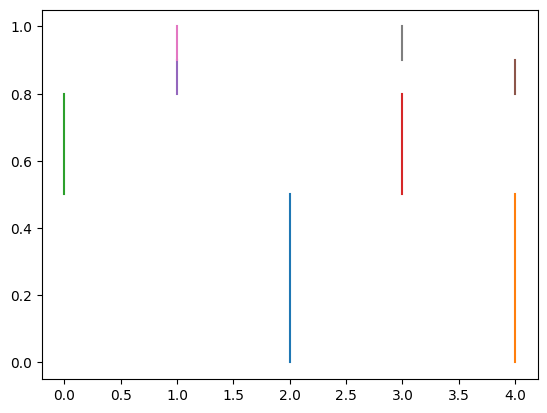

0 | Sample(probability=np.float64(0.4), ids=frozenset({2, 3}))
1 | Sample(probability=np.float64(0.2), ids=frozenset({1, 4}))
2 | Sample(probability=np.float64(0.3), ids=frozenset({0, 4}))
3 | Sample(probability=np.float64(0.1), ids=frozenset({2, 4}))


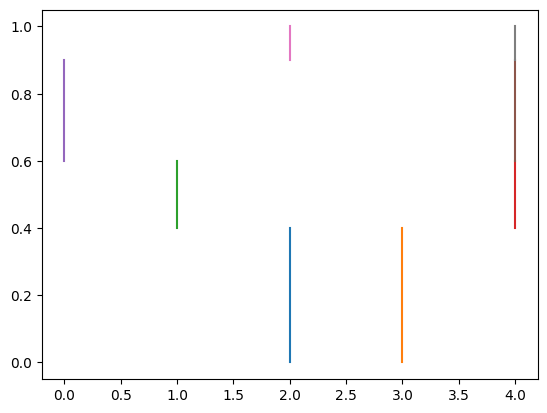

In [ ]:
inclusions = np.array([0.3, 0.2, 0.5, 0.4, 0.6])
AsDesign = Design(inclusions=inclusions)
print("Index | Sample")
print("----------------")
for i, sample in enumerate(AsDesign):
    print(f"{i:5d} | {sample}")
AsDesign.show()



inclusions = np.array([0.3, 0.2, 0.5, 0.4, 0.6])
perm = np.random.permutation(len(inclusions))
shuffled = inclusions[perm]
AsDesign = Design(inclusions=shuffled, perm=perm)
for i, sample in enumerate(AsDesign):
    print(f"{i} | {sample}")
AsDesign.show()